In [144]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [160]:

import json
import pandas as pd
dataset = pd.read_excel(r'C:\Users\admin\Desktop\traini\newsdata.xlsx')

print(dataset)

                                                  text  \
0    Exclusive: Boeing deliveries to China delayed ...   
1    Not all Fed officials favored tapering of bala...   
2    SandP 500 to end 2024 around current levels af...   
3    Cancer victims sue Johnson and Johnson over 'f...   
4    Fed shifts talk to 'scenarios' as policy grows...   
..                                                 ...   
171  Bird Flu Cases Spur Retail Trader Rush Into Va...   
172  KKR-Backed Simon and Schuster Asks to Delay to...   
173  Wind towers crumpled after Iowa wind farm suff...   
174  Charles Schwab to Roll Out Alternatives Platfo...   
175  KKR, TPG Said to Weigh PropertyGuru Options In...   

                            target  
0                  Regulatory News  
1                  Regulatory News  
2            Stock market updates   
3    Bankruptcy/ financial distres  
4                  Regulatory News  
..                             ...  
171           Stock market updates  
172    

In [161]:
dataset['target'] = dataset['target'].str.lower().str.strip()

In [162]:
target_target= dataset['target'].unique()
print(target_target)

['regulatory news' 'stock market updates' 'bankruptcy/ financial distres'
 'currency news' 'merger and acquisition' 'international trade updates'
 'corporate legal affairs' 'new product launch'
 'industry and economic updates' 'financial results' 'investment'
 'joint venture' 'other company updates' 'credit rating' 'project updates']


In [163]:
dataset['targetId'] = dataset['target'].factorize()[0]
dataset.head()

,text,target,targetId
0,Exclusive: Boeing deliveries to China delayed ...,regulatory news,0
1,Not all Fed officials favored tapering of bala...,regulatory news,0
2,SandP 500 to end 2024 around current levels af...,stock market updates,1
3,Cancer victims sue Johnson and Johnson over 'f...,bankruptcy/ financial distres,2
4,Fed shifts talk to 'scenarios' as policy grows...,regulatory news,0


In [164]:
target = dataset[['target', 'targetId']].drop_duplicates().sort_values('targetId')
print(target)

                            target  targetId
0                  regulatory news         0
2             stock market updates         1
3    bankruptcy/ financial distres         2
5                    currency news         3
7           merger and acquisition         4
9      international trade updates         5
11         corporate legal affairs         6
14              new product launch         7
16   industry and economic updates         8
30               financial results         9
31                      investment        10
44                   joint venture        11
47           other company updates        12
63                   credit rating        13
142                project updates        14


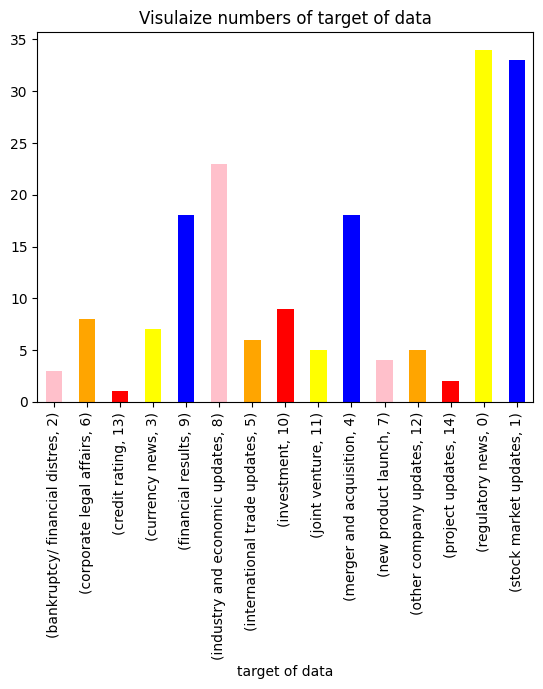

In [165]:
dataset.groupby('target').targetId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("target of data")
plt.title("Visulaize numbers of target of data")
plt.show()

In [ ]:
headline = dataset["headline"]
headline.head(10)

0    Exclusive: Boeing deliveries to China delayed ...
1    Not all Fed officials favored tapering of bala...
2    S&P 500 to end 2024 around current levels afte...
3    Cancer victims sue Johnson & Johnson over 'fra...
4    Fed shifts talk to 'scenarios' as policy grows...
5    Argentine black market peso hits record low as...
6    US lawmakers advance bill to make it easier to...
7    Anglo leaves door open to engage with BHP afte...
8    Lagardere says it is closing in on sale of Par...
9    Reuters Events: CSX fully resuming Baltimore c...
Name: headline, dtype: object

In [ ]:
target = dataset['target']
target.head(10)

0                   regulatory news
1                   regulatory news
2              stock market updates
3    bankruptcy/ financial distress
4                   regulatory news
5                     currency news
6                   regulatory news
7            merger and acquisition
8            merger and acquisition
9       international trade updates
Name: category, dtype: object

In [ ]:
def remove_tags(headline):
    remove = re.compile(r'')
    return re.sub(remove, '', headline)
dataset['headline'] = dataset['headline'].apply(remove_tags)

In [ ]:
def special_char(headline):
    reviews = ''
    for x in headline:
        if x.isalnum():
            reviews = reviews + x
        else:
            reviews = reviews + ' '
    return reviews
dataset['headline'] = dataset['headline'].apply(special_char)

In [ ]:
def convert_lower(headline):
    return headline.lower()
dataset['headline'] = dataset['headline'].apply(convert_lower)
dataset['headline'][1]

'not all fed officials favored tapering of balance sheet contraction process'

In [ ]:
def remove_stopwords(headline):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(headline)
    return [x for x in words if x not in stop_words]
dataset['headline'] = dataset['headline'].apply(remove_stopwords)
dataset['headline'][1]

['fed',
 'officials',
 'favored',
 'tapering',
 'balance',
 'sheet',
 'contraction',
 'process']

In [ ]:
dataset

,headline,category,CategoryId
0,"[exclusive, boeing, deliveries, china, delayed...",regulatory news,0
1,"[fed, officials, favored, tapering, balance, s...",regulatory news,0
2,"[p, 500, end, 2024, around, current, levels, s...",stock market updates,1
3,"[cancer, victims, sue, johnson, johnson, fraud...",bankruptcy/ financial distress,2
4,"[fed, shifts, talk, scenarios, policy, grows, ...",regulatory news,0
...,...,...,...
170,"[bird, flu, cases, spur, retail, trader, rush,...",stock market updates,1
171,"[kkr, backed, simon, schuster, asks, delay, fi...",financial results,9
172,"[wind, towers, crumpled, iowa, wind, farm, suf...",project update,14
173,"[charles, schwab, roll, alternatives, platform...",new product launch,7


In [ ]:
x = dataset['headline']
y = dataset['CategoryId']
print(x)
print(y)

0      [exclusive, boeing, deliveries, china, delayed...
1      [fed, officials, favored, tapering, balance, s...
2      [p, 500, end, 2024, around, current, levels, s...
3      [cancer, victims, sue, johnson, johnson, fraud...
4      [fed, shifts, talk, scenarios, policy, grows, ...
                             ...                        
170    [bird, flu, cases, spur, retail, trader, rush,...
171    [kkr, backed, simon, schuster, asks, delay, fi...
172    [wind, towers, crumpled, iowa, wind, farm, suf...
173    [charles, schwab, roll, alternatives, platform...
174    [kkr, tpg, said, weigh, propertyguru, options,...
Name: headline, Length: 175, dtype: object
0       0
1       0
2       1
3       2
4       0
       ..
170     1
171     9
172    14
173     7
174     4
Name: CategoryId, Length: 175, dtype: int64


In [ ]:
x = dataset['headline']
y = dataset['CategoryId']
print(x)
print(y)

0      [exclusive, boeing, deliveries, china, delayed...
1      [fed, officials, favored, tapering, balance, s...
2      [p, 500, end, 2024, around, current, levels, s...
3      [cancer, victims, sue, johnson, johnson, fraud...
4      [fed, shifts, talk, scenarios, policy, grows, ...
                             ...                        
170    [bird, flu, cases, spur, retail, trader, rush,...
171    [kkr, backed, simon, schuster, asks, delay, fi...
172    [wind, towers, crumpled, iowa, wind, farm, suf...
173    [charles, schwab, roll, alternatives, platform...
174    [kkr, tpg, said, weigh, propertyguru, options,...
Name: headline, Length: 175, dtype: object
0       0
1       0
2       1
3       2
4       0
       ..
170     1
171     9
172    14
173     7
174     4
Name: CategoryId, Length: 175, dtype: int64


In [ ]:
dataset['headline'] = dataset['headline'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Initialize CountVectorizer with a smaller number of features
cv = CountVectorizer(max_features=1000)  # Reduce the number of features

# Fit and transform the 'headline' column to a sparse matrix
x = cv.fit_transform(dataset['headline']).toarray()  # Convert to a more efficient data type

print("X.shape = ", x.shape)
print("y.shape = ", dataset['CategoryId'].shape)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, dataset['CategoryId'], test_size=0.3, random_state=0, shuffle=True)

print("Training set size:", x_train.shape)
print("Test set size:", x_test.shape)


X.shape =  (175, 951)
y.shape =  (175,)
Training set size: (122, 951)
Test set size: (53, 951)


In [ ]:
perform_list = [ ]
def run_model(model_name, est_c, est_pnlty):
    mdl = ""
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    print(f'Precision : {precision}')
    print(f'Recall : {recall}')
    print(f'F1-score : {f1score}')
    # Add performance parameters to list
    perform_list.append(dict([('Model', model_name),('Test Accuracy', round(accuracy, 2)),('Precision', round(precision, 2)),('Recall', round(recall, 2)),('F1', round(f1score, 2))]))
run_model('Logistic Regression', est_c=None, est_pnlty=None)
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)
run_model('Random Forest', est_c=None, est_pnlty=None)





Test Accuracy Score of Basic Logistic Regression: % 50.94
Precision : 0.5094339622641509
Recall : 0.5094339622641509
F1-score : 0.5094339622641509
Test Accuracy Score of Basic Gaussian Naive Bayes: % 33.96
Precision : 0.33962264150943394
Recall : 0.33962264150943394
F1-score : 0.33962264150943394
Test Accuracy Score of Basic Decision Tree Classifier: % 33.96
Precision : 0.33962264150943394
Recall : 0.33962264150943394
F1-score : 0.33962264150943394
Test Accuracy Score of Basic Support Vector Classifer: % 41.51
Precision : 0.41509433962264153
Recall : 0.41509433962264153
F1-score : 0.41509433962264153
Test Accuracy Score of Basic Multinomial Naive Bayes: % 54.72
Precision : 0.5471698113207547
Recall : 0.5471698113207547
F1-score : 0.5471698113207547
Test Accuracy Score of Basic Random Forest: % 50.94
Precision : 0.5094339622641509
Recall : 0.5094339622641509
F1-score : 0.5094339622641509


In [ ]:
classifier = LogisticRegression().fit(x_train, y_train)
classifier
y_pred = classifier.predict(x_test)

In [ ]:
category_mapping = {
    0: "Regulatory News",
    1: "Stock market update",
    2: "Bankruptcy/financial distress",
    3: "Currency News",
    4: "Merger & Acquisition",
    5: "International Trade Updates",
    6: "Corporate Legal Affairs",
    7: "New Product launch",
    8: "Industry and Economic updates",
    9: "Stock market updates",
    10: "Financial Results",
    11: "Investment",
    12: "financial results",
    13: "Partnership/Agreement",
    14: "Other Company updates",
    15: "Joint venture",
    16: "Financial results",
    17: "Credit Rating",
    18: "Other company updates",
    19: "Industry & Economic Updates",
    20: "New product launch",
    21: "Project update"
}

# Predicting the category of a new headline
new_headline = "Steelers WR Antonio Brown opens up on filing for bankruptcy - “I’m f*cked up”"
y_pred1 = cv.transform([new_headline]).toarray()
yy = classifier.predict(y_pred1)
# Map the prediction to the category
result = category_mapping.get(yy[0], "Unknown Category")
print(result)

Regulatory News
